### Make random stft spectrogram

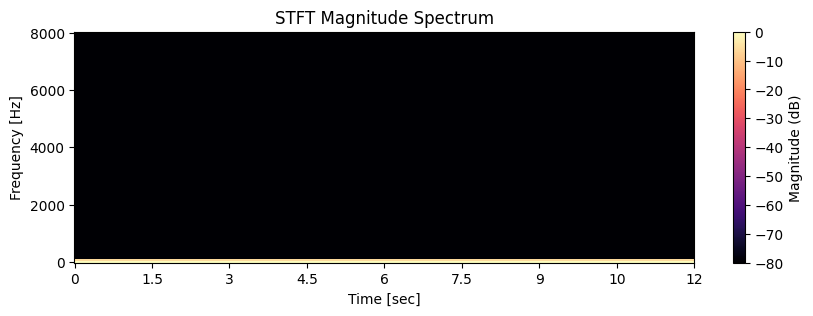

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 파라미터 설정
sample_rate = 16000  # 16kHz
duration = 12        # 12초
n_samples = sample_rate * duration

# 가상의 신호 생성 (화이트 노이즈)
np.random.seed(42)
signal = np.random.normal(-80, 0, n_samples)

def compute_spectrogram(y, n_fft, hop_length):
    S = librosa.stft(
        y=y,
        n_fft=n_fft,
        hop_length=hop_length,
        window="hann"
    )
    S_mag = np.abs(S)
    return S_mag

n_fft = 256
hop_length = n_fft // 4  # hop_length 설정 (n_fft의 1/4)

# 스펙트로그램 계산
S = compute_spectrogram(signal, n_fft, hop_length)
S_db = librosa.amplitude_to_db(S, ref=np.max)

# 스펙트로그램 시각화
fig, ax = plt.subplots(figsize=(10, 3))
img = librosa.display.specshow(S_db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax)
plt.title('STFT Magnitude Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
fig.colorbar(img, ax=ax, label='Magnitude (dB)')  # fig.colorbar에 img와 ax를 전달
plt.show()


### Select horizontal Stripe pattern

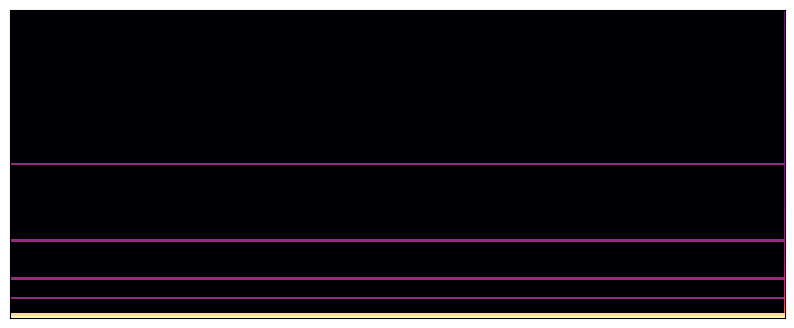

In [2]:
def add_horizontal_stripe_pattern(S_mag, stripe_freqs, sample_rate, intensity_factor=10):
    """
    스펙트로그램 진폭 값에 주어진 주파수 대역마다 가로선형 패턴 추가.

    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_freqs (list): 가로선 패턴을 추가할 주파수 대역 (Hz).
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float): 추가할 패턴의 강도 (배율).

    Returns:
        ndarray: 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])  # STFT 주파수 축 계산

    for freq in stripe_freqs:
        # 해당 주파수에 가장 가까운 인덱스 찾기
        freq_idx = np.argmin(np.abs(freqs - freq))
        S_mag_modified[freq_idx, :] += intensity_factor  # 강도 추가

    return S_mag_modified

# 주파수 패턴 추가
stripe_freqs = [500, 1000, 2000, 4000]  # 500Hz, 1000Hz, 2000Hz, 4000Hz에서 패턴 추가
S_mag_with_stripes = add_horizontal_stripe_pattern(S, stripe_freqs, sample_rate, intensity_factor=50)

# 진폭 값을 dB 스케일로 변환
S_db_with_stripes = librosa.amplitude_to_db(S_mag_with_stripes, ref=np.max)



include_ticks = False



# 패턴이 포함된 스펙트로그램 시각화
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_db_with_stripes, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax)
if not include_ticks:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
else:
    plt.title('STFT Magnitude Spectrum with Horizontal Stripe Pattern')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    fig.colorbar(img, ax=ax, label='Magnitude (dB)')
plt.show()


### Select Vertical Stripe Pattern

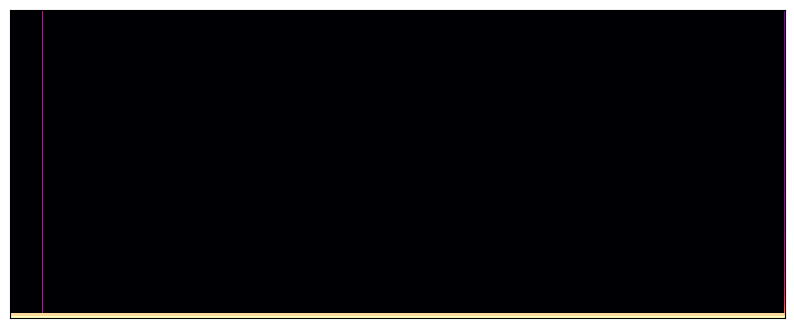

In [3]:
def add_vertical_stripe_pattern(S_mag, stripe_times, sample_rate, hop_length, intensity_factor=10):
    """
    스펙트로그램 진폭 값에 주어진 시간 대역마다 세로선형 패턴 추가.

    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_times (list): 세로선 패턴을 추가할 시간 대역 (밀리초).
        sample_rate (int): 샘플링 레이트 (Hz).
        hop_length (int): STFT의 hop_length (샘플 수).
        intensity_factor (float): 추가할 패턴의 강도 (배율).

    Returns:
        ndarray: 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    time_steps = np.arange(S_mag.shape[1]) * hop_length / sample_rate  # 시간 축 계산 (초 단위)
    stripe_times_sec = [t / 1000 for t in stripe_times]  # 밀리초를 초로 변환

    for time in stripe_times_sec:
        # 해당 시간에 가장 가까운 인덱스 찾기
        time_idx = np.argmin(np.abs(time_steps - time))
        S_mag_modified[:, time_idx] += intensity_factor  # 강도 추가

    return S_mag_modified

# 세로선 패턴 추가
stripe_times = [500, 1000, 1500, 2000]  # 밀리초 단위로 500ms, 1000ms, 1500ms, 2000ms에 패턴 추가
S_mag_with_vertical_stripes = add_vertical_stripe_pattern(S, stripe_times, sample_rate, hop_length, intensity_factor=50)

# 진폭 값을 dB 스케일로 변환
S_db_with_vertical_stripes = librosa.amplitude_to_db(S_mag_with_vertical_stripes, ref=np.max)

# 패턴이 포함된 스펙트로그램 시각화
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_db_with_vertical_stripes, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax)

if not include_ticks:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
else:
    plt.title('STFT Magnitude Spectrum with Vertical Stripe Pattern')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    fig.colorbar(img, ax=ax, label='Magnitude (dB)')
plt.show()


### random noise

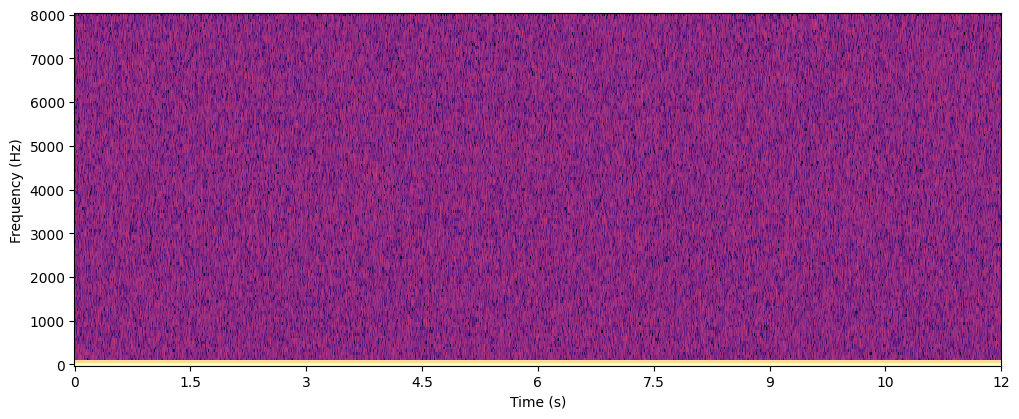

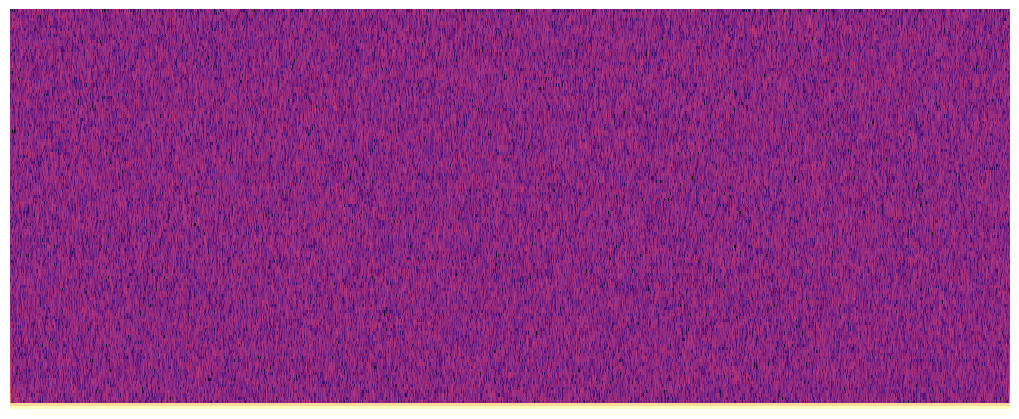

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 파라미터 설정
sample_rate = 16000  # 16kHz
duration = 12        # 12초
n_samples = sample_rate * duration

n_fft = 256
hop_length = n_fft // 4  # hop_length 설정 (n_fft의 1/4)

# 노이즈 생성 함수
def generate_noise(n_samples, noise_strength=0.1):
    """신호에 노이즈를 추가하는 함수.
    noise_strength는 노이즈의 강도를 결정하며, 0에 가까울수록 적고 1에 가까울수록 강해짐.
    """
    noise = np.random.normal(0, noise_strength, n_samples)  # 평균 0, 표준편차는 noise_strength
    return noise

# 스펙트로그램 계산 및 시각화 (축 표시)
def compute_and_plot_linear_spectrogram_with_labels(y: np.ndarray, sr: int, n_fft: int, hop_length: int):
    S = np.abs(librosa.stft(
        y=y,
        n_fft=n_fft,
        hop_length=hop_length,
        window='hann',
    ))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    fig, ax = plt.subplots(figsize=(10, 4))
    img = librosa.display.specshow(
        S_db,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
    )
    ax.set_xlabel('Time (s)')  # x축 라벨 추가
    ax.set_ylabel('Frequency (Hz)')  # y축 라벨 추가
    plt.tight_layout(pad=0)
    return fig, ax


def compute_and_plot_linear_spectrogram_no_labels(y: np.ndarray, sr: int, n_fft: int, hop_length: int):
    S = np.abs(librosa.stft(
        y=y,
        n_fft=n_fft,
        hop_length=hop_length,
        window='hann',
    ))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    fig, ax = plt.subplots(figsize=(10, 4))
    img = librosa.display.specshow(
        S_db,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
    )
    ax.axis('off')  # 축 제거
    plt.tight_layout(pad=0)
    return fig, ax

# 가상의 신호 생성 (화이트 노이즈)
np.random.seed(42)
signal = np.random.normal(-80, 0, n_samples)  # 기본 신호

noise_strength = 5

noise = generate_noise(n_samples, noise_strength)
signal_with_noise = signal + noise

# 스펙트로그램 계산 및 시각화
fig, ax = compute_and_plot_linear_spectrogram_with_labels(signal_with_noise, sample_rate, n_fft, hop_length)
plt.show()

# 스펙트로그램 계산 및 시각화
fig, ax = compute_and_plot_linear_spectrogram_no_labels(signal_with_noise, sample_rate, n_fft, hop_length)
plt.show()



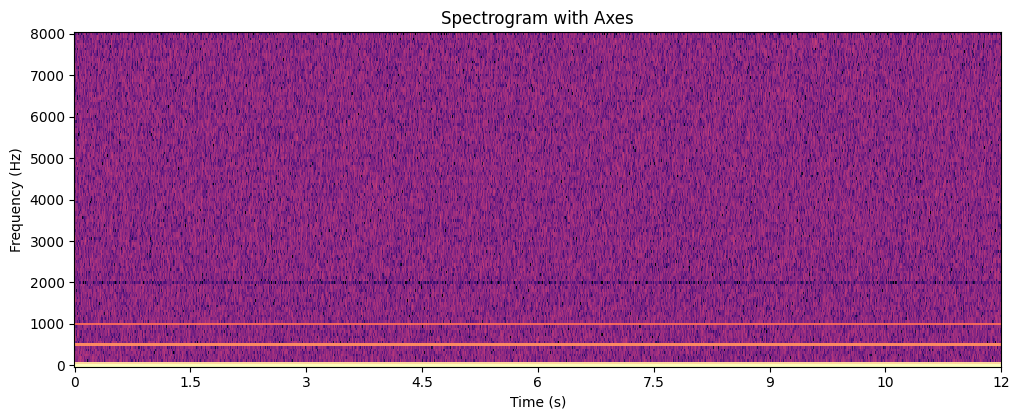

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def generate_noise(n_samples, noise_strength=0.1):
    """신호에 노이즈를 추가하는 함수."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise


def add_horizontal_stripe_pattern(S_mag, stripe_freqs, sample_rate):
    """
    스펙트로그램 진폭 값에 주어진 주파수 대역마다 가로선형 패턴을 추가합니다.
    강도도 각 주파수에 대해 개별적으로 설정합니다.
    
    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_freqs (list): 가로선 패턴을 추가할 주파수 대역과 강도 [{freq, strength}].
        sample_rate (int): 샘플링 레이트 (Hz).
    
    Returns:
        ndarray: 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])

    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength = stripe['strength']
        freq_idx = np.argmin(np.abs(freqs - freq))  # 해당 주파수 인덱스 찾기
        S_mag_modified[freq_idx, :] += strength  # 주파수에 맞는 강도 추가

    return S_mag_modified


def compute_and_plot_spectrogram(
        signal, sample_rate, n_fft=256, hop_length=None, stripe_freqs=None,
        noise_strength=0.1, show_labels=True):
    """
    신호에 노이즈를 추가하고, 스펙트로그램을 계산한 후 지정된 주파수 대역에 가로선형 패턴을 추가하고 시각화합니다.
    
    Args:
        signal (ndarray): 입력 신호.
        sample_rate (int): 샘플링 레이트 (Hz).
        n_fft (int): FFT 크기.
        hop_length (int): Hop 길이.
        stripe_freqs (list): 가로선 패턴을 추가할 주파수 대역과 강도 [{freq, strength}].
        noise_strength (float): 추가할 노이즈의 강도.
        show_labels (bool): 축 표시 여부 (True: 축 표시, False: 축 제거).
    
    Returns:
        fig, ax: 시각화된 스펙트로그램의 figure와 axis 객체.
    """
    if stripe_freqs is None:
        stripe_freqs = [{'freq': 500, 'strength': 10}, {'freq': 1000, 'strength': 10},
                        {'freq': 2000, 'strength': 10}, {'freq': 4000, 'strength': 10}]

    if hop_length is None:
        hop_length = n_fft // 4  # 기본 hop_length 설정

    # 노이즈 생성 및 추가
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # 스펙트로그램 계산
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # 가로선형 패턴 추가
    S_mag_with_stripes = add_horizontal_stripe_pattern(S, stripe_freqs, sample_rate)

    # 진폭 값을 dB 스케일로 변환
    S_db_with_stripes = librosa.amplitude_to_db(S_mag_with_stripes, ref=np.max)

    # 스펙트로그램 시각화
    fig, ax = plt.subplots(figsize=(10, 4))
    img = librosa.display.specshow(
        S_db_with_stripes,  # 수정: S_db_with_stripes 사용
        sr=sample_rate,     # 수정: sr -> sample_rate
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Axes')
    else:
        ax.axis('off')  # 축 제거
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백을 0으로 설정

    plt.tight_layout(pad=0)
    return fig, ax


# 예시 사용법
sample_rate = 16000
duration = 12  # 12초
n_samples = sample_rate * duration

# 가상의 신호 생성 (화이트 노이즈)
np.random.seed(42)
signal = np.random.normal(-80, 0, n_samples)  # 기본 신호

# 첫 번째 스펙트로그램 (축이 있는 버전)
stripe_freqs = [{'freq': 500, 'strength': 1000}, {'freq': 1000, 'strength': 500}, {'freq': 2000, 'strength': -50}]
fig, ax = compute_and_plot_spectrogram(
    signal, 
    sample_rate, 
    n_fft=256, 
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    noise_strength=5, 
    show_labels=True  # 축을 표시
)
plt.show()



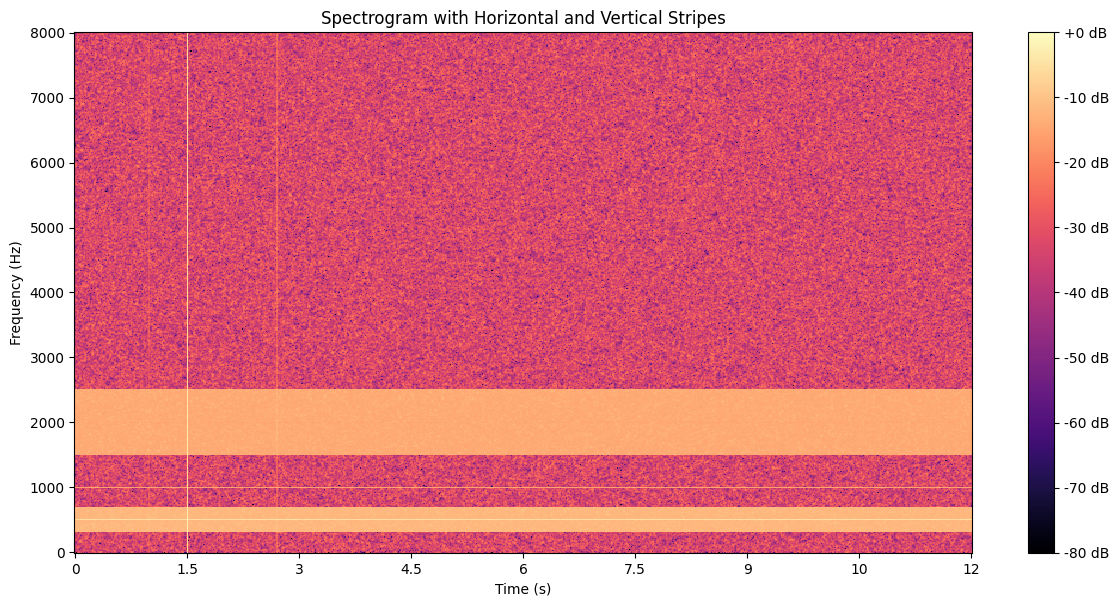

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def generate_noise(n_samples, noise_strength=0.1):
    """Adds Gaussian noise to a signal."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise

def add_horizontal_stripe_pattern(S_mag, stripe_freqs, sample_rate, intensity_factor=10):
    """
    Adds horizontal stripe patterns to the spectrogram at specified frequencies.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_freqs (list): List of dictionaries with 'freq' and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with horizontal stripes.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])

    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength = stripe['strength']
        freq_idx = np.argmin(np.abs(freqs - freq))  # Find the closest frequency index
        S_mag_modified[freq_idx, :] += strength * intensity_factor  # Add strength to the entire frequency row

    return S_mag_modified

def add_horizontal_stripe_pattern_range(S_mag, stripe_freq_ranges, sample_rate, intensity_factor=10):
    """
    Adds horizontal stripe patterns to the spectrogram over specified frequency ranges.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with horizontal stripes over frequency ranges.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    for stripe in stripe_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength = stripe['strength']
        
        # Find indices of frequencies within the specified range
        freq_indices = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]
        
        # Add strength to each frequency in the range
        S_mag_modified[freq_indices, :] += strength * intensity_factor
    
    return S_mag_modified

def add_vertical_stripe_pattern(S_mag, stripe_times, sample_rate, hop_length, intensity_factor=10):
    """
    Adds vertical stripe patterns to the spectrogram at specified times.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_times (list): List of dictionaries with 'time' and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        hop_length (int): Hop length used in STFT.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with vertical stripes.
    """
    S_mag_modified = S_mag.copy()
    # Calculate the time for each frame
    times = librosa.frames_to_time(np.arange(S_mag.shape[1]), sr=sample_rate, hop_length=hop_length)

    for stripe in stripe_times:
        time = stripe['time']
        strength = stripe['strength']
        # Find the frame index closest to the specified time
        time_idx = np.argmin(np.abs(times - time))
        # Add strength across all frequencies at this time frame
        S_mag_modified[:, time_idx] += strength * intensity_factor

    return S_mag_modified

def compute_and_plot_spectrogram(
        signal, sample_rate, n_fft=256, hop_length=None, 
        stripe_freqs=None, stripe_freq_ranges=None,
        stripe_times=None, noise_strength=0.1, show_labels=True):
    """
    Adds noise to the signal, computes the spectrogram, adds horizontal and vertical stripe patterns, and visualizes it.
    
    Args:
        signal (ndarray): Input signal.
        sample_rate (int): Sampling rate in Hz.
        n_fft (int): FFT window size.
        hop_length (int): Hop length for STFT.
        stripe_freqs (list): List of dictionaries with 'freq' and 'strength' for horizontal stripes.
        stripe_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', and 'strength' for horizontal stripe ranges.
        stripe_times (list): List of dictionaries with 'time' and 'strength' for vertical stripes.
        noise_strength (float): Standard deviation of the Gaussian noise to add.
        show_labels (bool): Whether to show axis labels and title.
    
    Returns:
        fig, ax: Matplotlib figure and axis objects.
    """
    if stripe_freqs is None:
        stripe_freqs = []
    
    if stripe_freq_ranges is None:
        stripe_freq_ranges = []
    
    if stripe_times is None:
        stripe_times = []

    if hop_length is None:
        hop_length = n_fft // 4  # Default hop_length

    # Generate and add noise
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # Compute the spectrogram
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # Add horizontal stripe patterns (single frequencies)
    S_mag_with_stripes = add_horizontal_stripe_pattern(S, stripe_freqs, sample_rate)

    # Add horizontal stripe patterns (frequency ranges)
    if stripe_freq_ranges:
        S_mag_with_stripes = add_horizontal_stripe_pattern_range(
            S_mag_with_stripes, stripe_freq_ranges, sample_rate
        )

    # Add vertical stripe patterns (time-based)
    S_mag_with_stripes_and_verticals = add_vertical_stripe_pattern(
        S_mag_with_stripes, stripe_times, sample_rate, hop_length
    )

    # Convert amplitude to dB scale
    S_db_with_stripes = librosa.amplitude_to_db(S_mag_with_stripes_and_verticals, ref=np.max)

    # Plot the spectrogram
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(
        S_db_with_stripes,
        sr=sample_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
        cmap='magma'  # You can choose other colormaps like 'viridis', 'plasma', etc.
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Horizontal and Vertical Stripes')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    else:
        ax.axis('off')  # Remove axes
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove margins

    plt.tight_layout(pad=0.5)
    return fig, ax

# Parameters
sample_rate = 16000  # 16 kHz
duration = 12  # 12 seconds
n_samples = sample_rate * duration

# Generate a synthetic signal (Gaussian noise)
np.random.seed(42)
signal = np.random.normal(0, 1, n_samples)  # Mean=0, Std=1

# Define horizontal stripes (single frequencies)
stripe_freqs = [
    {'freq': 500, 'strength': 100},
    {'freq': 1000, 'strength': 50},
    {'freq': 2000, 'strength': -5}
]

# Define horizontal stripes (frequency ranges)
stripe_freq_ranges = [
    {'freq_min': 300, 'freq_max': 700, 'strength': 80},
    {'freq_min': 1500, 'freq_max': 2500, 'strength': 60}
]

# Define vertical stripes (time-based)
stripe_times = [
    {'time': 1, 'strength': 5},
    {'time': 2.7, 'strength': 10},
    {'time': 1.5, 'strength': 150}
]

# Compute and plot the spectrogram with stripes
fig, ax = compute_and_plot_spectrogram(
    signal, 
    sample_rate, 
    n_fft=1024,  # Increased FFT size for better frequency resolution
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    stripe_freq_ranges=stripe_freq_ranges,
    stripe_times=stripe_times, 
    noise_strength=5, 
    show_labels=True  # Show axis labels and title
)
plt.show()


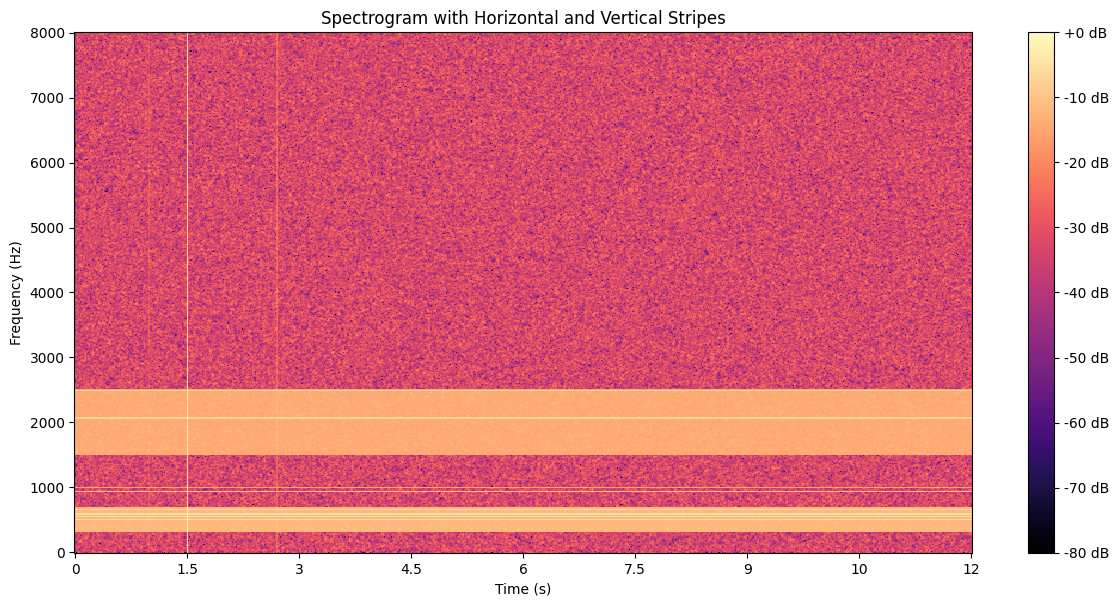

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def generate_noise(n_samples, noise_strength=0.1):
    """Adds Gaussian noise to a signal."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise

def add_horizontal_stripe_pattern(S_mag, stripe_freqs, sample_rate, intensity_factor=10):
    """
    Adds horizontal stripe patterns to the spectrogram at specified frequencies.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_freqs (list): List of dictionaries with 'freq' and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with horizontal stripes.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])

    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength = stripe['strength']
        freq_idx = np.argmin(np.abs(freqs - freq))  # Find the closest frequency index
        S_mag_modified[freq_idx, :] += strength * intensity_factor  # Add strength to the entire frequency row

    # Ensure no negative magnitudes
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_horizontal_stripe_pattern_range(S_mag, stripe_freq_ranges, sample_rate, intensity_factor=10):
    """
    Adds horizontal stripe patterns to the spectrogram over specified frequency ranges.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with horizontal stripes over frequency ranges.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    for stripe in stripe_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength = stripe['strength']
        
        # Find indices of frequencies within the specified range
        freq_indices = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]
        
        # Add strength to each frequency in the range
        S_mag_modified[freq_indices, :] += strength * intensity_factor
    
    # Ensure no negative magnitudes
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_random_horizontal_stripes_in_range(S_mag, stripe_random_freq_ranges, sample_rate, intensity_factor=10):
    """
    Adds a specified number of horizontal stripe patterns at random frequencies within given frequency ranges.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_random_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', 'strength', and 'n'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with random horizontal stripes in the specified frequency ranges.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    for stripe in stripe_random_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength = stripe['strength']
        n = stripe['n']  # Number of random stripes to add
        
        # Find frequencies within the range
        available_freqs = freqs[(freqs >= freq_min) & (freqs <= freq_max)]
        
        if len(available_freqs) == 0:
            print(f"No frequencies available in the range {freq_min}-{freq_max} Hz.")
            continue  # Skip if no frequencies in the range
        
        if n > len(available_freqs):
            print(f"Requested number of stripes ({n}) exceeds available frequencies ({len(available_freqs)}) in the range {freq_min}-{freq_max} Hz. Reducing n to {len(available_freqs)}.")
            n = len(available_freqs)  # Limit n to the number of available frequencies
        
        # Randomly select n frequencies within the range without replacement
        random_freqs = np.random.choice(available_freqs, size=n, replace=False)
        
        for freq in random_freqs:
            freq_idx = np.argmin(np.abs(freqs - freq))  # Find the closest frequency index
            S_mag_modified[freq_idx, :] += strength * intensity_factor  # Add strength to the entire frequency row
    
    # Ensure no negative magnitudes
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_vertical_stripe_pattern(S_mag, stripe_times, sample_rate, hop_length, intensity_factor=10):
    """
    Adds vertical stripe patterns to the spectrogram at specified times.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_times (list): List of dictionaries with 'time' and 'strength'.
        sample_rate (int): Sampling rate in Hz.
        hop_length (int): Hop length used in STFT.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with vertical stripes.
    """
    S_mag_modified = S_mag.copy()
    # Calculate the time for each frame
    times = librosa.frames_to_time(np.arange(S_mag.shape[1]), sr=sample_rate, hop_length=hop_length)

    for stripe in stripe_times:
        time = stripe['time']
        strength = stripe['strength']
        # Find the frame index closest to the specified time
        time_idx = np.argmin(np.abs(times - time))
        # Add strength across all frequencies at this time frame
        S_mag_modified[:, time_idx] += strength * intensity_factor

    # Ensure no negative magnitudes
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def compute_and_plot_spectrogram(
        signal, sample_rate, n_fft=256, hop_length=None, 
        stripe_freqs=None, stripe_freq_ranges=None, stripe_random_freq_ranges=None,
        stripe_times=None, noise_strength=0.1, show_labels=True,
        colormap='magma'):
    """
    Adds noise to the signal, computes the spectrogram, adds horizontal and vertical stripe patterns, and visualizes it.
    
    Args:
        signal (ndarray): Input signal.
        sample_rate (int): Sampling rate in Hz.
        n_fft (int): FFT window size.
        hop_length (int): Hop length for STFT.
        stripe_freqs (list): List of dictionaries with 'freq' and 'strength' for horizontal stripes.
        stripe_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', and 'strength' for horizontal stripe ranges.
        stripe_random_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', 'strength', and 'n' for random horizontal stripes.
        stripe_times (list): List of dictionaries with 'time' and 'strength' for vertical stripes.
        noise_strength (float): Standard deviation of the Gaussian noise to add.
        show_labels (bool): Whether to show axis labels and title.
        colormap (str): Matplotlib colormap to use for the spectrogram.
    
    Returns:
        fig, ax: Matplotlib figure and axis objects.
    """
    if stripe_freqs is None:
        stripe_freqs = []
    
    if stripe_freq_ranges is None:
        stripe_freq_ranges = []
    
    if stripe_random_freq_ranges is None:
        stripe_random_freq_ranges = []
    
    if stripe_times is None:
        stripe_times = []

    if hop_length is None:
        hop_length = n_fft // 4  # Default hop_length

    # Generate and add noise
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # Compute the spectrogram
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # Add horizontal stripe patterns (single frequencies)
    S_mag_with_stripes = add_horizontal_stripe_pattern(S, stripe_freqs, sample_rate)

    # Add horizontal stripe patterns (frequency ranges)
    if stripe_freq_ranges:
        S_mag_with_stripes = add_horizontal_stripe_pattern_range(
            S_mag_with_stripes, stripe_freq_ranges, sample_rate
        )

    # Add random horizontal stripe patterns within frequency ranges
    if stripe_random_freq_ranges:
        S_mag_with_stripes = add_random_horizontal_stripes_in_range(
            S_mag_with_stripes, stripe_random_freq_ranges, sample_rate
        )

    # Add vertical stripe patterns (time-based)
    S_mag_with_stripes_and_verticals = add_vertical_stripe_pattern(
        S_mag_with_stripes, stripe_times, sample_rate, hop_length
    )

    # Convert amplitude to dB scale
    S_db_with_stripes = librosa.amplitude_to_db(S_mag_with_stripes_and_verticals, ref=np.max)

    # Plot the spectrogram
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(
        S_db_with_stripes,
        sr=sample_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
        cmap=colormap  # Use the specified colormap
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Horizontal and Vertical Stripes')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    else:
        ax.axis('off')  # Remove axes
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove margins

    plt.tight_layout(pad=0.5)
    return fig, ax

# Parameters
sample_rate = 16000  # 16 kHz
duration = 12  # 12 seconds
n_samples = sample_rate * duration

# Generate a synthetic signal (Gaussian noise)
np.random.seed(42)
signal = np.random.normal(0, 1, n_samples)  # Mean=0, Std=1

# Define horizontal stripes (single frequencies)
stripe_freqs = [
    {'freq': 500, 'strength': 100},
    {'freq': 1000, 'strength': 50},
    {'freq': 2000, 'strength': -5}
]

# Define horizontal stripes (frequency ranges)
stripe_freq_ranges = [
    {'freq_min': 300, 'freq_max': 700, 'strength': 80},
    {'freq_min': 1500, 'freq_max': 2500, 'strength': 60}
]

# Define random horizontal stripes (frequency ranges with n)
stripe_random_freq_ranges = [
    {'freq_min': 500, 'freq_max': 1000, 'strength': 100, 'n': 5},  # 5 random stripes between 500-1000 Hz
    {'freq_min': 2000, 'freq_max': 3000, 'strength': 80, 'n': 3}   # 3 random stripes between 2000-3000 Hz
]

# Define vertical stripes (time-based)
stripe_times = [
    {'time': 1, 'strength': 5},
    {'time': 2.7, 'strength': 10},
    {'time': 1.5, 'strength': 150}
]

# Compute and plot the spectrogram with stripes
fig, ax = compute_and_plot_spectrogram(
    signal, 
    sample_rate, 
    n_fft=1024,  # Increased FFT size for better frequency resolution
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    stripe_freq_ranges=stripe_freq_ranges,
    stripe_random_freq_ranges=stripe_random_freq_ranges,
    stripe_times=stripe_times, 
    noise_strength=5, 
    show_labels=True,
    colormap='magma'  # Choose your preferred colormap
)
plt.show()

# Optionally, save the spectrogram
# plt.savefig('spectrogram_with_random_stripes.png', dpi=300, bbox_inches='tight')


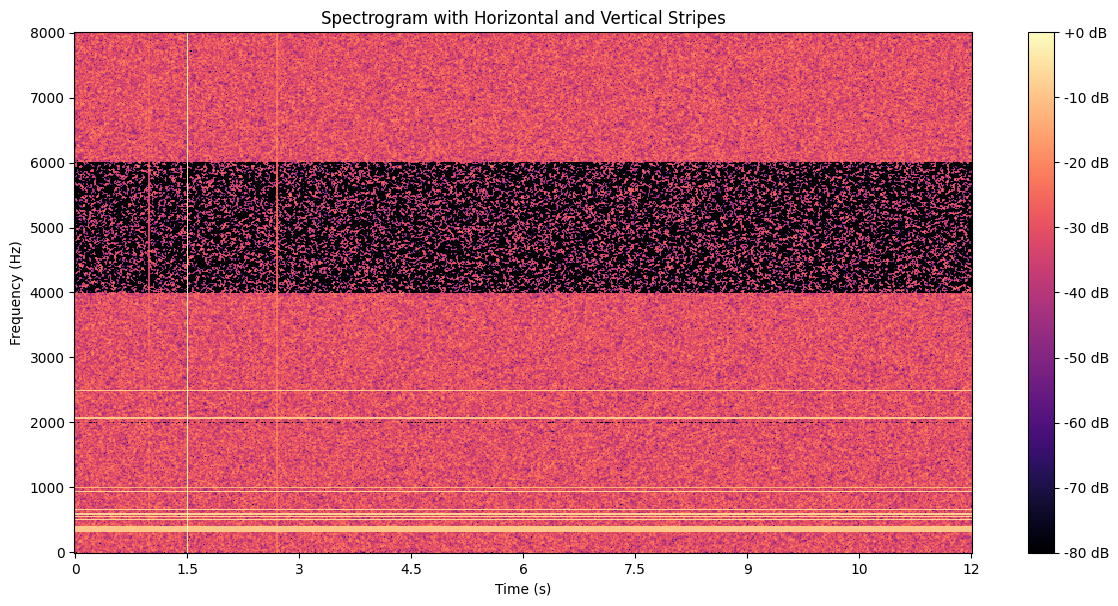

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def generate_noise(n_samples, noise_strength=0.1):
    """신호에 가우시안 노이즈를 추가합니다."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise

def add_horizontal_stripe_pattern(S_mag, stripe_freqs, sample_rate, intensity_factor=10):
    """
    지정된 주파수에 가로선형 패턴을 추가합니다.
    
    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_freqs (list): 'freq'와 'strength'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 10.
    
    Returns:
        ndarray: 지정된 주파수에 가로선형 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])

    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength = stripe['strength']
        freq_idx = np.argmin(np.abs(freqs - freq))  # 가장 가까운 주파수 인덱스 찾기
        S_mag_modified[freq_idx, :] += strength * intensity_factor  # 패턴 추가

    # 음수 값 방지
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_horizontal_stripe_pattern_range(S_mag, stripe_freq_ranges, sample_rate, intensity_factor=10):
    """
    지정된 주파수 구간에 가로선형 패턴을 추가합니다.
    
    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_freq_ranges (list): 'freq_min', 'freq_max', 'strength'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 10.
    
    Returns:
        ndarray: 지정된 주파수 구간에 가로선형 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    for stripe in stripe_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength = stripe['strength']
        
        # 주파수 구간 내의 주파수 인덱스 찾기
        freq_indices = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]
        
        # 패턴 추가
        S_mag_modified[freq_indices, :] += strength * intensity_factor
    
    # 음수 값 방지
    # S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_random_horizontal_stripes_within_range(S_mag, freq_min, freq_max, strength, n, sample_rate, intensity_factor=10):
    """
    지정된 주파수 구간 내에서 임의의 n개의 가로선형 패턴을 추가합니다.
    
    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        freq_min (float): 주파수 구간의 최소값 (Hz).
        freq_max (float): 주파수 구간의 최대값 (Hz).
        strength (float): 패턴의 강도.
        n (int): 생성할 가로선형 패턴의 개수.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 10.
    
    Returns:
        ndarray: 지정된 주파수 구간 내에 임의의 가로선형 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    # 주파수 구간 내의 주파수 인덱스 찾기
    available_freqs = freqs[(freqs >= freq_min) & (freqs <= freq_max)]
    
    if len(available_freqs) == 0:
        print(f"주파수 구간 {freq_min}-{freq_max} Hz 내에 사용할 수 있는 주파수가 없습니다.")
        return S_mag_modified  # 주파수 구간에 주파수가 없으면 그대로 반환
    
    if n > len(available_freqs):
        print(f"요청한 패턴 수(n={n})가 주파수 구간 {freq_min}-{freq_max} Hz 내의 사용 가능한 주파수 수({len(available_freqs)})를 초과합니다. n을 {len(available_freqs)}로 조정합니다.")
        n = len(available_freqs)  # 가능한 최대 패턴 수로 조정
    
    # 주파수 구간 내에서 임의의 n개 주파수 선택 (중복 없이)
    random_freqs = np.random.choice(available_freqs, size=n, replace=False)
    
    for freq in random_freqs:
        freq_idx = np.argmin(np.abs(freqs - freq))  # 가장 가까운 주파수 인덱스 찾기
        S_mag_modified[freq_idx, :] += strength * intensity_factor  # 패턴 추가
    
    # 음수 값 방지
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_vertical_stripe_pattern(S_mag, stripe_times, sample_rate, hop_length, intensity_factor=10):
    """
    지정된 시간에 세로선형 패턴을 추가합니다.
    
    Args:
        S_mag (ndarray): 스펙트로그램 진폭 값.
        stripe_times (list): 'time'과 'strength'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        hop_length (int): STFT의 hop 길이.
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 10.
    
    Returns:
        ndarray: 지정된 시간에 세로선형 패턴이 추가된 스펙트로그램 진폭 값.
    """
    S_mag_modified = S_mag.copy()
    # 각 프레임의 시간 계산
    times = librosa.frames_to_time(np.arange(S_mag.shape[1]), sr=sample_rate, hop_length=hop_length)

    for stripe in stripe_times:
        time = stripe['time']
        strength = stripe['strength']
        # 지정된 시간에 가장 가까운 프레임 인덱스 찾기
        time_idx = np.argmin(np.abs(times - time))
        # 해당 프레임 전체 주파수에 패턴 추가
        S_mag_modified[:, time_idx] += strength * intensity_factor

    # 음수 값 방지
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def compute_and_plot_spectrogram(
        signal, sample_rate, n_fft=256, hop_length=None, 
        stripe_freqs=None, stripe_freq_ranges=None, 
        stripe_random_freq_ranges=None, stripe_times=None, 
        noise_strength=0.1, show_labels=True,
        colormap='magma', overall_scaling=1.0):
    """
    신호에 노이즈를 추가하고, 스펙트로그램을 계산한 후 지정된 주파수 구간과 시간 대역에 가로선형/세로선형 패턴을 추가하고 시각화합니다.
    
    Args:
        signal (ndarray): 입력 신호.
        sample_rate (int): 샘플링 레이트 (Hz).
        n_fft (int): FFT 창 크기.
        hop_length (int, optional): STFT의 hop 길이. 기본값은 n_fft의 1/4.
        stripe_freqs (list, optional): 단일 주파수에 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq'와 'strength'를 포함.
        stripe_freq_ranges (list, optional): 주파수 구간에 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq_min', 'freq_max', 'strength'를 포함.
        stripe_random_freq_ranges (list, optional): 주파수 구간 내에서 임의의 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq_min', 'freq_max', 'strength', 'n'을 포함.
        stripe_times (list, optional): 시간 지점에 세로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'time'과 'strength'를 포함.
        noise_strength (float, optional): 추가할 노이즈의 표준 편차. 기본값은 0.1.
        show_labels (bool, optional): 축 레이블과 제목을 표시할지 여부. 기본값은 True.
        colormap (str, optional): 스펙트로그램에 사용할 Matplotlib 컬러맵. 기본값은 'magma'.
        overall_scaling (float, optional): 전체 스펙트로그램의 진폭을 스케일링하는 계수. 기본값은 1.0 (변경 없음).
    
    Returns:
        fig, ax: 시각화된 스펙트로그램의 figure와 axis 객체.
    """
    if stripe_freqs is None:
        stripe_freqs = []
    
    if stripe_freq_ranges is None:
        stripe_freq_ranges = []
    
    if stripe_random_freq_ranges is None:
        stripe_random_freq_ranges = []
    
    if stripe_times is None:
        stripe_times = []

    if hop_length is None:
        hop_length = n_fft // 4  # 기본 hop_length 설정

    # 노이즈 생성 및 추가
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # 스펙트로그램 계산
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # 단일 주파수에 가로선형 패턴 추가
    S_mag_with_stripes = add_horizontal_stripe_pattern(S, stripe_freqs, sample_rate)

    # 주파수 구간에 가로선형 패턴 추가
    if stripe_freq_ranges:
        S_mag_with_stripes = add_horizontal_stripe_pattern_range(
            S_mag_with_stripes, stripe_freq_ranges, sample_rate
        )

    # 주파수 구간 내에서 임의의 가로선형 패턴 추가
    if stripe_random_freq_ranges:
        for stripe in stripe_random_freq_ranges:
            S_mag_with_stripes = add_random_horizontal_stripes_within_range(
                S_mag_with_stripes,
                stripe['freq_min'],
                stripe['freq_max'],
                stripe['strength'],
                stripe['n'],
                sample_rate,
                intensity_factor=10  # 필요에 따라 조정
            )

    # 세로선형 패턴 추가
    S_mag_with_stripes_and_verticals = add_vertical_stripe_pattern(
        S_mag_with_stripes, stripe_times, sample_rate, hop_length
    )

    # 전체 스펙트로그램 스케일링 (강도 조절)
    S_mag_scaled = S_mag_with_stripes_and_verticals * overall_scaling

    # 진폭을 dB 스케일로 변환
    S_db_with_stripes = librosa.amplitude_to_db(S_mag_scaled, ref=np.max)

    # 스펙트로그램 시각화
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(
        S_db_with_stripes,
        sr=sample_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
        cmap=colormap
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Horizontal and Vertical Stripes')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    else:
        ax.axis('off')  # 축 제거
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백 제거

    plt.tight_layout(pad=0.5)
    return fig, ax

# 파라미터 설정
sample_rate = 16000  # 16 kHz
duration = 12  # 12초
n_samples = sample_rate * duration

# 신호 생성 (가우시안 노이즈)
np.random.seed(42)
signal = np.random.normal(0, 1, n_samples)  # 평균=0, 표준편차=1

# 가로선형 패턴 정의 (단일 주파수)
stripe_freqs = [
    {'freq': 500, 'strength': 100},
    {'freq': 1000, 'strength': 50},
    {'freq': 2000, 'strength': -5}  # 음수 strength
]

# 가로선형 패턴 정의 (주파수 구간)
stripe_freq_ranges = [
    {'freq_min': 300, 'freq_max': 400, 'strength': 80},
    {'freq_min': 4000, 'freq_max': 6000, 'strength': -10}  # 음수 strength
]

# 임의의 가로선형 패턴 정의 (주파수 구간 내에서 n개)
stripe_random_freq_ranges = [
    {'freq_min': 500, 'freq_max': 1000, 'strength': 100, 'n': 5},  # 500-1000 Hz 내에서 5개 패턴
    {'freq_min': 2000, 'freq_max': 3000, 'strength': 80, 'n': 3}   # 2000-3000 Hz 내에서 3개 패턴
]

# 세로선형 패턴 정의 (시간 기반)
stripe_times = [
    {'time': 1, 'strength': 5},
    {'time': 2.7, 'strength': 10},
    {'time': 1.5, 'strength': 150}
]

# 전체 스펙트로그램의 강도를 조절하기 위한 scaling factor
overall_scaling = 1.0  # 1.0이면 변경 없음, 0.5이면 반으로, 2.0이면 두 배로

# 스펙트로그램 계산 및 시각화
fig, ax = compute_and_plot_spectrogram(
    signal, 
    sample_rate, 
    n_fft=1024,  # 주파수 해상도 향상을 위해 FFT 크기 증가
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    stripe_freq_ranges=stripe_freq_ranges,
    stripe_random_freq_ranges=stripe_random_freq_ranges,
    stripe_times=stripe_times, 
    noise_strength=5, 
    show_labels=True,
    colormap='magma',  # 원하는 컬러맵 선택
    overall_scaling=1.0  # 전체 스펙트로그램의 강도 조절
)
plt.show()

# 스펙트로그램 저장 (옵션)
# plt.savefig('spectrogram_with_random_stripes.png', dpi=300, bbox_inches='tight')


### add_horizontal_stripe_pattern_range_dB 을 linear하게 value를 add하지 않고 지수적으로 계산

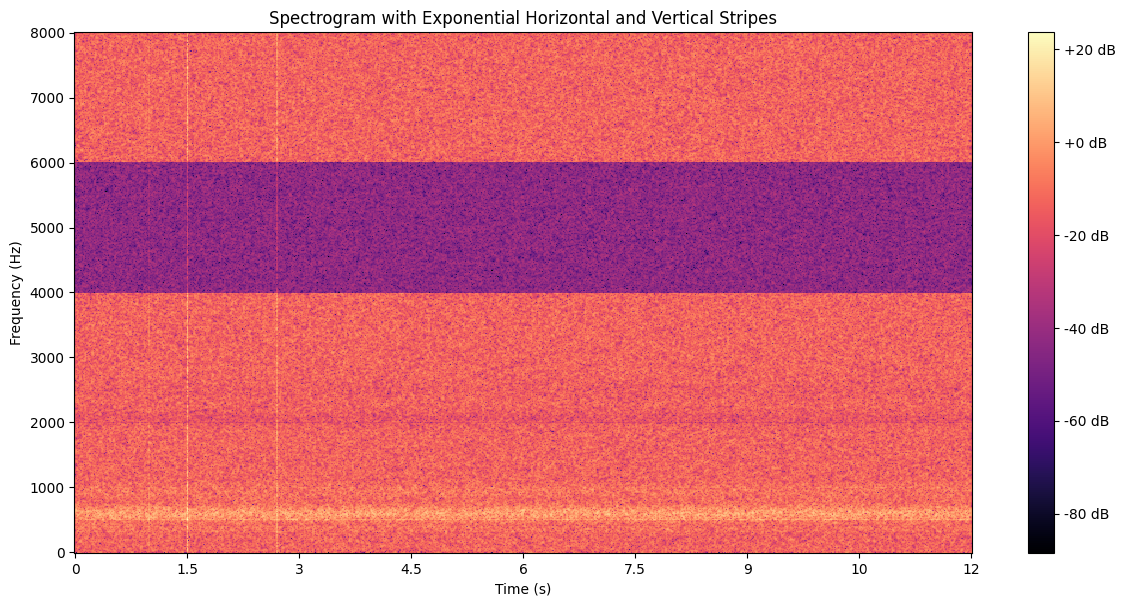

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal.windows import gaussian

def generate_noise(n_samples, noise_strength=0.1):
    """신호에 가우시안 노이즈를 추가합니다."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise

def add_horizontal_stripe_pattern_dB(S_db, stripe_freqs, sample_rate, intensity_factor=1.0):
    """
    지정된 주파수에 데시벨 스케일로 가로선형 패턴을 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_freqs (list): 'freq'와 'strength_dB'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
    
    Returns:
        ndarray: 지정된 주파수에 가로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    freqs = np.linspace(0, sample_rate / 2, S_db.shape[0])

    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength_dB = stripe['strength_dB'] * intensity_factor
        freq_idx = np.argmin(np.abs(freqs - freq))  # 가장 가까운 주파수 인덱스 찾기
        S_db_modified[freq_idx, :] += strength_dB  # 데시벨 추가

    return S_db_modified

def add_horizontal_stripe_pattern_range_dB(S_db, stripe_freq_ranges, sample_rate, intensity_factor=1.0):
    """
    지정된 주파수 구간에 데시벨 스케일로 가로선형 패턴을 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_freq_ranges (list): 'freq_min', 'freq_max', 'strength_dB'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
    
    Returns:
        ndarray: 지정된 주파수 구간에 가로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    freqs = np.linspace(0, sample_rate / 2, S_db.shape[0])
    
    for stripe in stripe_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength_dB = stripe['strength_dB'] * intensity_factor
        
        # 주파수 구간 내의 주파수 인덱스 찾기
        freq_indices = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]
        
        # 패턴 추가
        S_db_modified[freq_indices, :] += strength_dB
    
    return S_db_modified

def add_random_horizontal_stripes_in_range(S_mag, stripe_random_freq_ranges, sample_rate, intensity_factor=10):
    """
    Adds a specified number of horizontal stripe patterns at random frequencies within given frequency ranges.
    
    Args:
        S_mag (ndarray): Spectrogram magnitude.
        stripe_random_freq_ranges (list): List of dictionaries with 'freq_min', 'freq_max', 'strength', and 'n'.
        sample_rate (int): Sampling rate in Hz.
        intensity_factor (float): Factor to scale the stripe intensity.
    
    Returns:
        ndarray: Modified spectrogram magnitude with random horizontal stripes in the specified frequency ranges.
    """
    S_mag_modified = S_mag.copy()
    freqs = np.linspace(0, sample_rate / 2, S_mag.shape[0])
    
    for stripe in stripe_random_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength = stripe['strength']
        n = stripe['n']  # Number of random stripes to add
        
        # Find frequencies within the range
        available_freqs = freqs[(freqs >= freq_min) & (freqs <= freq_max)]
        
        if len(available_freqs) == 0:
            print(f"No frequencies available in the range {freq_min}-{freq_max} Hz.")
            continue  # Skip if no frequencies in the range
        
        if n > len(available_freqs):
            print(f"Requested number of stripes ({n}) exceeds available frequencies ({len(available_freqs)}) in the range {freq_min}-{freq_max} Hz. Reducing n to {len(available_freqs)}.")
            n = len(available_freqs)  # Limit n to the number of available frequencies
        
        # Randomly select n frequencies within the range without replacement
        random_freqs = np.random.choice(available_freqs, size=n, replace=False)
        
        for freq in random_freqs:
            freq_idx = np.argmin(np.abs(freqs - freq))  # Find the closest frequency index
            S_mag_modified[freq_idx, :] += strength * intensity_factor  # Add strength to the entire frequency row
    
    # Ensure no negative magnitudes
    S_mag_modified = np.clip(S_mag_modified, a_min=0, a_max=None)
    return S_mag_modified

def add_vertical_stripe_pattern_dB(S_db, stripe_times, sample_rate, hop_length, intensity_factor=1.0):
    """
    지정된 시간에 데시벨 스케일로 세로선형 패턴을 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_times (list): 'time'과 'strength_dB'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        hop_length (int): STFT의 hop 길이.
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
    
    Returns:
        ndarray: 지정된 시간에 세로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    # 각 프레임의 시간 계산
    times = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sample_rate, hop_length=hop_length)
    
    for stripe in stripe_times:
        time = stripe['time']
        strength_dB = stripe['strength_dB'] * intensity_factor
        # 지정된 시간에 가장 가까운 프레임 인덱스 찾기
        time_idx = np.argmin(np.abs(times - time))
        # 해당 프레임 전체 주파수에 패턴 추가
        S_db_modified[:, time_idx] += strength_dB
    
    return S_db_modified

def compute_and_plot_spectrogram_dB(
        signal, sample_rate, n_fft=256, hop_length=None, 
        stripe_freqs=None, stripe_freq_ranges=None, 
        stripe_random_freq_ranges=None, stripe_times=None, 
        noise_strength=0.1, show_labels=True,
        colormap='magma', overall_scaling=1.0):
    """
    신호에 노이즈를 추가하고, 스펙트로그램을 계산한 후 지정된 주파수 구간과 시간 대역에 데시벨 스케일로 가로선형/세로선형 패턴을 추가하고 시각화합니다.
    
    Args:
        signal (ndarray): 입력 신호.
        sample_rate (int): 샘플링 레이트 (Hz).
        n_fft (int): FFT 창 크기.
        hop_length (int, optional): STFT의 hop 길이. 기본값은 n_fft의 1/4.
        stripe_freqs (list, optional): 단일 주파수에 데시벨 스케일 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq'와 'strength_dB'를 포함.
        stripe_freq_ranges (list, optional): 주파수 구간에 데시벨 스케일 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq_min', 'freq_max', 'strength_dB'를 포함.
        stripe_random_freq_ranges (list, optional): 주파수 구간 내에서 임의의 데시벨 스케일 가로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'freq_min', 'freq_max', 'strength_dB', 'n'을 포함.
        stripe_times (list, optional): 시간 지점에 데시벨 스케일 세로선형 패턴을 추가할 딕셔너리 리스트. 각 딕셔너리는 'time'과 'strength_dB'를 포함.
        noise_strength (float, optional): 추가할 노이즈의 표준 편차. 기본값은 0.1.
        show_labels (bool, optional): 축 레이블과 제목을 표시할지 여부. 기본값은 True.
        colormap (str, optional): 스펙트로그램에 사용할 Matplotlib 컬러맵. 기본값은 'magma'.
        overall_scaling (float, optional): 전체 스펙트로그램의 dB 값을 스케일링하는 계수. 기본값은 1.0 (변경 없음).
    
    Returns:
        fig, ax: 시각화된 스펙트로그램의 figure와 axis 객체.
    """
    if stripe_freqs is None:
        stripe_freqs = []
    
    if stripe_freq_ranges is None:
        stripe_freq_ranges = []
    
    if stripe_random_freq_ranges is None:
        stripe_random_freq_ranges = []
    
    if stripe_times is None:
        stripe_times = []

    if hop_length is None:
        hop_length = n_fft // 4  # 기본 hop_length 설정

    # 노이즈 생성 및 추가
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # 스펙트로그램 계산 (진폭 스케일)
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # 진폭을 dB 스케일로 변환
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    # 단일 주파수에 데시벨 스케일 가로선형 패턴 추가
    S_db_with_stripes = add_horizontal_stripe_pattern_dB(S_db, stripe_freqs, sample_rate, intensity_factor=1.0)

    # 주파수 구간에 데시벨 스케일 가로선형 패턴 추가
    if stripe_freq_ranges:
        S_db_with_stripes = add_horizontal_stripe_pattern_range_dB(
            S_db_with_stripes, stripe_freq_ranges, sample_rate, intensity_factor=1.0
        )

    # 주파수 구간 내에서 임의의 데시벨 스케일 가로선형 패턴 추가
    if stripe_random_freq_ranges:
        for stripe in stripe_random_freq_ranges:
            S_db_with_stripes = add_random_horizontal_stripes_within_range_dB(
                S_db_with_stripes,
                stripe['freq_min'],
                stripe['freq_max'],
                stripe['strength_dB'],
                stripe['n'],
                sample_rate,
                intensity_factor=1.0  # 필요에 따라 조정
            )

    # 세로선형 패턴 추가 (데시벨 스케일)
    S_db_with_stripes_and_verticals = add_vertical_stripe_pattern_dB(
        S_db_with_stripes, stripe_times, sample_rate, hop_length, intensity_factor=1.0
    )

    # 전체 스펙트로그램의 dB 값 스케일링
    S_db_scaled = S_db_with_stripes_and_verticals * overall_scaling

    # 스펙트로그램 시각화
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(
        S_db_scaled,
        sr=sample_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
        cmap=colormap
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Exponential Horizontal and Vertical Stripes')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    else:
        ax.axis('off')  # 축 제거
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백 제거

    plt.tight_layout(pad=0.5)
    return fig, ax



# 파라미터 설정
sample_rate = 16000  # 16 kHz
duration = 12  # 12초
n_samples = sample_rate * duration

# 신호 생성 (가우시안 노이즈)
np.random.seed(42)
signal = np.random.normal(0, 1, n_samples)  # 평균=0, 표준편차=1

# 가로선형 패턴 정의 (단일 주파수)
stripe_freqs = [
    {'freq': 500, 'strength_dB': 5},    # 500 Hz에서 +5 dB
    {'freq': 1000, 'strength_dB': 2},   # 1000 Hz에서 +2 dB
    {'freq': 2000, 'strength_dB': -5}   # 2000 Hz에서 -5 dB
]

# 가로선형 패턴 정의 (주파수 구간)
stripe_freq_ranges = [
    {'freq_min': 300, 'freq_max': 400, 'strength_dB': 3},   # 300-400 Hz에서 +3 dB
    {'freq_min': 4000, 'freq_max': 6000, 'strength_dB': -30} # 4000-6000 Hz에서 -3 dB
]

# 임의의 가로선형 패턴 정의 (주파수 구간 내에서 n개)
stripe_random_freq_ranges = [
    {'freq_min': 500, 'freq_max': 1000, 'strength_dB': 4, 'n': 5},  # 500-1000 Hz 내에서 5개 패턴 (+4 dB)
    {'freq_min': 2000, 'freq_max': 3000, 'strength_dB': -2, 'n': 3}  # 2000-3000 Hz 내에서 3개 패턴 (-2 dB)
]

# 세로선형 패턴 정의 (시간 기반)
stripe_times = [
    {'time': 1, 'strength_dB': 5},    # 1초 지점에서 +5 dB
    {'time': 2.7, 'strength_dB': 10}, # 2.7초 지점에서 +10 dB
    {'time': 1.5, 'strength_dB': 15}  # 1.5초 지점에서 +15 dB
]

# 전체 스펙트로그램의 강도를 조절하기 위한 scaling factor
overall_scaling = 1.0  # 1.0이면 변경 없음, 0.5이면 반으로, 2.0이면 두 배로

# 스펙트로그램 계산 및 시각화
fig, ax = compute_and_plot_spectrogram_dB(
    signal, 
    sample_rate, 
    n_fft=1024,  # 주파수 해상도 향상을 위해 FFT 크기 증가
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    stripe_freq_ranges=stripe_freq_ranges,
    stripe_random_freq_ranges=stripe_random_freq_ranges,
    stripe_times=stripe_times, 
    noise_strength=5, 
    show_labels=True,
    colormap='magma',  # 원하는 컬러맵 선택
    overall_scaling=1.0  # 전체 스펙트로그램의 강도 조절
)
plt.show()

# 스펙트로그램 저장 (옵션)
# plt.savefig('spectrogram_with_exponential_stripes.png', dpi=300, bbox_inches='tight')


### add_horizontal_stripe_pattern_range_dB에서 계산되는 value들을 normal distribution에서 sampling

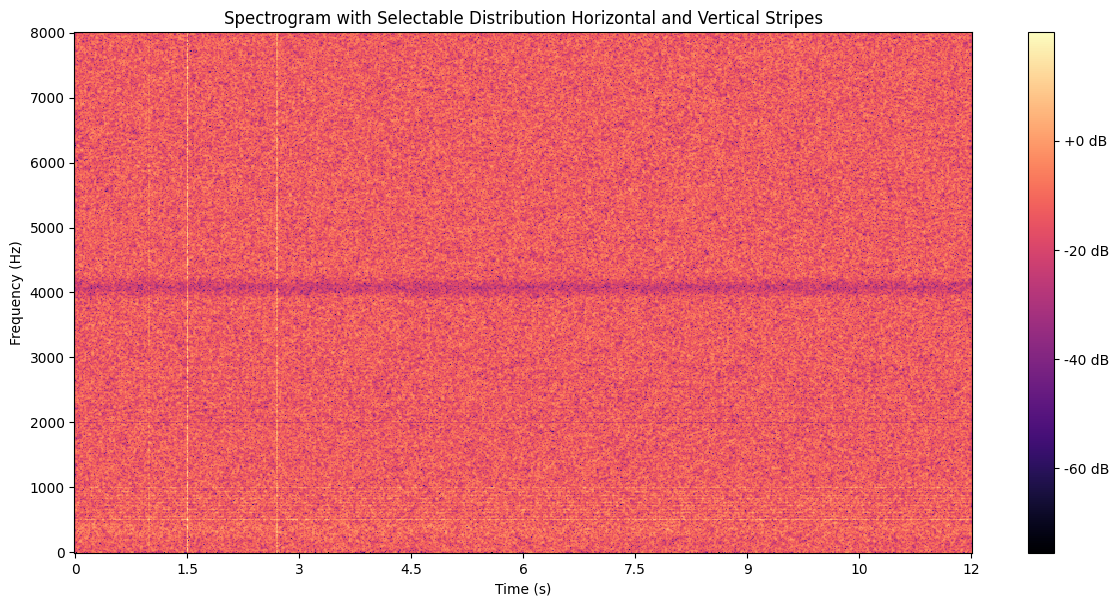

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def generate_noise(n_samples, noise_strength=0.1):
    """신호에 가우시안 노이즈를 추가합니다."""
    noise = np.random.normal(0, noise_strength, n_samples)
    return noise

def add_horizontal_stripe_pattern_dB(S_db, stripe_freqs, sample_rate, intensity_factor=1.0):
    """
    지정된 주파수에 데시벨 스케일로 단일 가로선형 패턴을 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_freqs (list): 'freq'와 'strength_dB'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
    
    Returns:
        ndarray: 지정된 주파수에 가로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    freqs = np.linspace(0, sample_rate / 2, S_db.shape[0])
    
    for stripe in stripe_freqs:
        freq = stripe['freq']
        strength_dB = stripe['strength_dB'] * intensity_factor
        freq_idx = np.argmin(np.abs(freqs - freq))  # 가장 가까운 주파수 인덱스 찾기
        S_db_modified[freq_idx, :] += strength_dB  # 데시벨 추가
    
    return S_db_modified

def add_horizontal_stripe_pattern_range_dB(S_db, stripe_freq_ranges, sample_rate, 
                                         distribution='gaussian', 
                                         distribution_params=None, 
                                         intensity_factor=1.0, sigma=5, mode='random'):
    """
    지정된 주파수 구간에 데시벨 스케일로 가로선형 패턴을 추가합니다.
    선택한 분포(Gaussian, Uniform, Poisson) 또는 선형 방식에 따라 패턴을 적용합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_freq_ranges (list): 'freq_min', 'freq_max', 'strength_dB', 'n', 'mode'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        distribution (str, optional): 패턴에 사용할 분포 유형 ('gaussian', 'uniform', 'poisson'). 기본값은 'gaussian'.
        distribution_params (dict, optional): 분포별 추가 매개변수. 기본값은 None.
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
        sigma (float, optional): 가우시안 분포의 표준편차 (주파수 단위). 기본값은 5.
        mode (str, optional): 'random' 또는 'linear'. 기본값은 'random'.
    
    Returns:
        ndarray: 지정된 주파수 구간에 가로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    freqs = np.linspace(0, sample_rate / 2, S_db.shape[0])

    for stripe in stripe_freq_ranges:
        freq_min = stripe['freq_min']
        freq_max = stripe['freq_max']
        strength_dB = stripe['strength_dB'] * intensity_factor
        n = stripe.get('n', 1)  # 패턴 수, 기본값은 1
        current_mode = stripe.get('mode', mode)  # 개별 모드 설정, 기본값은 함수의 mode 매개변수

        # 주파수 구간 내의 주파수 인덱스 찾기
        freq_indices = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]

        if len(freq_indices) == 0:
            print(f"주파수 구간 {freq_min}-{freq_max} Hz 내에 사용할 수 있는 주파수가 없습니다.")
            continue

        if current_mode == 'linear':
            # n개의 균등하게 분포된 주파수 선택
            selected_indices = np.linspace(freq_indices.min(), freq_indices.max(), num=n, dtype=int)
            selected_indices = selected_indices[selected_indices < len(freqs)]
        elif current_mode == 'random':
            # n개의 무작위 주파수 선택
            if n > len(freq_indices):
                print(f"요청한 패턴 수(n={n})가 주파수 구간 {freq_min}-{freq_max} Hz 내의 사용 가능한 주파수 수({len(freq_indices)})를 초과합니다. n을 {len(freq_indices)}로 조정합니다.")
                n = len(freq_indices)  # 가능한 최대 패턴 수로 조정
            selected_indices = np.random.choice(freq_indices, size=n, replace=False)
        else:
            print(f"알 수 없는 모드: {current_mode}. 'random' 모드를 사용합니다.")
            if n > len(freq_indices):
                n = len(freq_indices)
            selected_indices = np.random.choice(freq_indices, size=n, replace=False)

        for freq_idx in selected_indices:
            # 선택한 분포에 따라 윈도우 생성
            if distribution == 'gaussian':
                gauss_window = gaussian(21, std=sigma)
                gauss_window /= gauss_window.max()  # 정규화
            elif distribution == 'uniform':
                gauss_window = np.ones(21)
                gauss_window /= gauss_window.max()  # 정규화
            elif distribution == 'poisson':
                lambda_param = distribution_params.get('lambda', 3) if distribution_params else 3
                gauss_window = np.random.poisson(lam=lambda_param, size=21)
                gauss_window = gauss_window.astype(float)
                if gauss_window.max() > 0:
                    gauss_window /= gauss_window.max()
                else:
                    gauss_window = np.ones(21)
            else:
                print(f"알 수 없는 분포 유형: {distribution}. 'gaussian' 분포를 사용합니다.")
                gauss_window = gaussian(21, std=sigma)
                gauss_window /= gauss_window.max()

            # 패턴을 스펙트로그램에 추가
            half_window = len(gauss_window) // 2
            for i, offset in enumerate(range(-half_window, half_window + 1)):
                f_idx = freq_idx + offset
                if 0 <= f_idx < S_db.shape[0]:
                    S_db_modified[f_idx, :] += strength_dB * gauss_window[i]

    return S_db_modified

def add_random_horizontal_stripes_within_range_dB(S_db, freq_min, freq_max, strength_dB, 
                                                 n, sample_rate, mode='random'):
    """
    지정된 주파수 구간 내에서 n개의 단일 데시벨 스케일 가로선형 패턴을 선형 또는 무작위 방식으로 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        freq_min (float): 주파수 구간의 최소값 (Hz).
        freq_max (float): 주파수 구간의 최대값 (Hz).
        strength_dB (float): 패턴의 강도 (dB).
        n (int): 생성할 가로선형 패턴의 개수.
        sample_rate (int): 샘플링 레이트 (Hz).
        mode (str, optional): 'random' 또는 'linear'. 기본값은 'random'.
    
    Returns:
        ndarray: 지정된 주파수 구간 내에 가로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    freqs = np.linspace(0, sample_rate / 2, S_db.shape[0])
    
    # 주파수 구간 내의 주파수 인덱스 찾기
    available_freqs = np.where((freqs >= freq_min) & (freqs <= freq_max))[0]
    
    if len(available_freqs) == 0:
        print(f"주파수 구간 {freq_min}-{freq_max} Hz 내에 사용할 수 있는 주파수가 없습니다.")
        return S_db_modified  # 주파수 구간에 주파수가 없으면 그대로 반환
    
    if mode == 'linear':
        # n개의 균등하게 분포된 주파수 선택
        selected_indices = np.linspace(available_freqs.min(), available_freqs.max(), num=n, dtype=int)
        selected_indices = selected_indices[selected_indices < len(freqs)]
    elif mode == 'random':
        # n개의 무작위 주파수 선택
        if n > len(available_freqs):
            print(f"요청한 패턴 수(n={n})가 주파수 구간 {freq_min}-{freq_max} Hz 내의 사용 가능한 주파수 수({len(available_freqs)})를 초과합니다. n을 {len(available_freqs)}로 조정합니다.")
            n = len(available_freqs)  # 가능한 최대 패턴 수로 조정
        selected_indices = np.random.choice(available_freqs, size=n, replace=False)
    else:
        print(f"알 수 없는 모드: {mode}. 'random' 모드를 사용합니다.")
        if n > len(available_freqs):
            n = len(available_freqs)
        selected_indices = np.random.choice(available_freqs, size=n, replace=False)
    
    for freq_idx in selected_indices:
        S_db_modified[freq_idx, :] += strength_dB  # 단일 주파수에 강도 추가
    
    return S_db_modified

def add_vertical_stripe_pattern_dB(S_db, stripe_times, sample_rate, hop_length, intensity_factor=1.0):
    """
    지정된 시간에 데시벨 스케일로 세로선형 패턴을 추가합니다.
    
    Args:
        S_db (ndarray): 스펙트로그램 dB 스케일 값.
        stripe_times (list): 'time'과 'strength_dB'를 포함하는 딕셔너리 리스트.
        sample_rate (int): 샘플링 레이트 (Hz).
        hop_length (int): STFT의 hop 길이.
        intensity_factor (float, optional): 패턴 강도 조절 계수. 기본값은 1.0.
    
    Returns:
        ndarray: 지정된 시간에 세로선형 패턴이 추가된 스펙트로그램 dB 스케일 값.
    """
    S_db_modified = S_db.copy()
    # 각 프레임의 시간 계산
    times = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sample_rate, hop_length=hop_length)
    
    for stripe in stripe_times:
        time = stripe['time']
        strength_dB = stripe['strength_dB'] * intensity_factor
        # 지정된 시간에 가장 가까운 프레임 인덱스 찾기
        time_idx = np.argmin(np.abs(times - time))
        # 해당 프레임 전체 주파수에 패턴 추가
        S_db_modified[:, time_idx] += strength_dB
    
    return S_db_modified

def compute_and_plot_spectrogram_dB(
        signal, sample_rate, n_fft=256, hop_length=None, 
        stripe_freqs=None, stripe_freq_ranges=None, 
        stripe_random_freq_ranges=None, stripe_times=None, 
        noise_strength=0.1, show_labels=True,
        colormap='magma', overall_scaling=1.0):
    """
    신호에 노이즈를 추가하고, 스펙트로그램을 계산한 후 지정된 주파수 구간과 시간 대역에 
    데시벨 스케일로 가로선형/세로선형 패턴을 선형 또는 무작위 방식으로 추가하고 시각화합니다.
    
    Args:
        signal (ndarray): 입력 신호.
        sample_rate (int): 샘플링 레이트 (Hz).
        n_fft (int): FFT 창 크기.
        hop_length (int, optional): STFT의 hop 길이. 기본값은 n_fft의 1/4.
        stripe_freqs (list, optional): 단일 주파수에 데시벨 스케일 가로선형 패턴을 추가할 딕셔너리 리스트. 
                                       각 딕셔너리는 'freq'와 'strength_dB'를 포함.
        stripe_freq_ranges (list, optional): 주파수 구간에 데시벨 스케일 가로선형 패턴을 추가할 딕셔너리 리스트. 
                                             각 딕셔너리는 'freq_min', 'freq_max', 'strength_dB', 'n', 'mode'를 포함.
        stripe_random_freq_ranges (list, optional): 주파수 구간 내에서 임의의 데시벨 스케일 가로선형 패턴을 추가할 
                                                     딕셔너리 리스트. 각 딕셔너리는 'freq_min', 'freq_max', 
                                                     'strength_dB', 'n', 'mode'를 포함.
        stripe_times (list, optional): 시간 지점에 데시벨 스케일 세로선형 패턴을 추가할 딕셔너리 리스트. 
                                       각 딕셔너리는 'time'과 'strength_dB'를 포함.
        noise_strength (float, optional): 추가할 노이즈의 표준 편차. 기본값은 0.1.
        show_labels (bool, optional): 축 레이블과 제목을 표시할지 여부. 기본값은 True.
        colormap (str, optional): 스펙트로그램에 사용할 Matplotlib 컬러맵. 기본값은 'magma'.
        overall_scaling (float, optional): 전체 스펙트로그램의 dB 값을 스케일링하는 계수. 기본값은 1.0 (변경 없음).
    
    Returns:
        fig, ax: 시각화된 스펙트로그램의 figure와 axis 객체.
    """
    if stripe_freqs is None:
        stripe_freqs = []
    
    if stripe_freq_ranges is None:
        stripe_freq_ranges = []
    
    if stripe_random_freq_ranges is None:
        stripe_random_freq_ranges = []
    
    if stripe_times is None:
        stripe_times = []

    if hop_length is None:
        hop_length = n_fft // 4  # 기본 hop_length 설정

    # 노이즈 생성 및 추가
    noise = generate_noise(len(signal), noise_strength)
    signal_with_noise = signal + noise

    # 스펙트로그램 계산 (진폭 스케일)
    S = np.abs(librosa.stft(signal_with_noise, n_fft=n_fft, hop_length=hop_length, window='hann'))

    # 진폭을 dB 스케일로 변환
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    # 단일 주파수에 데시벨 스케일 가로선형 패턴 추가
    if stripe_freqs:
        S_db = add_horizontal_stripe_pattern_dB(S_db, stripe_freqs, sample_rate, intensity_factor=1.0)

    # 주파수 구간에 데시벨 스케일 가로선형 패턴 추가 (Gaussian 윈도우 사용)
    if stripe_freq_ranges:
        S_db = add_horizontal_stripe_pattern_range_dB(
            S_db, 
            stripe_freq_ranges, 
            sample_rate, 
            distribution='gaussian',  # Gaussian 분포 사용
            distribution_params=None, 
            intensity_factor=1.0, 
            sigma=5,
            mode='random'  # 기본 모드는 'random'
        )

    # 주파수 구간 내에서 임의의 데시벨 스케일 가로선형 패턴 추가 (단일 주파수, 선형 또는 무작위)
    if stripe_random_freq_ranges:
        for stripe in stripe_random_freq_ranges:
            S_db = add_random_horizontal_stripes_within_range_dB(
                S_db,
                stripe['freq_min'],
                stripe['freq_max'],
                stripe['strength_dB'],
                stripe['n'],
                sample_rate,
                mode=stripe.get('mode', 'random')  # 개별 모드 설정
            )

    # 세로선형 패턴 추가 (데시벨 스케일)
    if stripe_times:
        S_db = add_vertical_stripe_pattern_dB(
            S_db, stripe_times, sample_rate, hop_length, intensity_factor=1.0
        )

    # 전체 스펙트로그램의 dB 값 스케일링
    S_db_scaled = S_db * overall_scaling

    # 스펙트로그램 시각화
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(
        S_db_scaled,
        sr=sample_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax,
        cmap=colormap
    )

    if show_labels:
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title('Spectrogram with Selectable Distribution Horizontal and Vertical Stripes')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    else:
        ax.axis('off')  # 축 제거
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백 제거

    plt.tight_layout(pad=0.5)
    return fig, ax

# 파라미터 설정
sample_rate = 16000  # 16 kHz
duration = 12  # 12초
n_samples = sample_rate * duration

# 신호 생성 (가우시안 노이즈)
np.random.seed(42)
signal = np.random.normal(0, 1, n_samples)  # 평균=0, 표준편차=1

# 가로선형 패턴 정의 (단일 주파수)
stripe_freqs = [
    {'freq': 500, 'strength_dB': 5},    # 500 Hz에서 +5 dB
    {'freq': 1000, 'strength_dB': 2},   # 1000 Hz에서 +2 dB
    {'freq': 2000, 'strength_dB': -5}   # 2000 Hz에서 -5 dB
]

# 가로선형 패턴 정의 (주파수 구간)
stripe_freq_ranges = [
    {'freq_min': 300, 'freq_max': 400, 'strength_dB': 3, 'mode': 'random'},   # 300-400 Hz에서 3개 패턴 (+3 dB)
    {'freq_min': 4000, 'freq_max': 6000, 'strength_dB': -10, 'mode': 'random'} # 4000-6000 Hz에서 5개 패턴 (-10 dB)
]

# 임의의 가로선형 패턴 정의 (주파수 구간 내에서 n개, 선형 방식 사용)
stripe_random_freq_ranges = [
    {'freq_min': 500, 'freq_max': 1000, 'strength_dB': 4, 'n': 10, 'mode': 'linear'},  # 500-1000 Hz 내에서 10개 패턴 (+4 dB)
    {'freq_min': 2000, 'freq_max': 3000, 'strength_dB': -2, 'n': 10, 'mode': 'linear'}  # 2000-3000 Hz 내에서 10개 패턴 (-2 dB)
]

# 세로선형 패턴 정의 (시간 기반)
stripe_times = [
    {'time': 1, 'strength_dB': 5},    # 1초 지점에서 +5 dB
    {'time': 2.7, 'strength_dB': 10}, # 2.7초 지점에서 +10 dB
    {'time': 1.5, 'strength_dB': 15}  # 1.5초 지점에서 +15 dB
]

# 전체 스펙트로그램의 강도를 조절하기 위한 scaling factor
overall_scaling = 1.0  # 1.0이면 변경 없음, 0.5이면 반으로, 2.0이면 두 배로

# 패턴의 폭을 조절하기 위한 가우시안 표준편차
# stripe_random_freq_ranges에서는 사용하지 않으므로 필요 없음
sigma = 50  

# 스펙트로그램 계산 및 시각화
fig, ax = compute_and_plot_spectrogram_dB(
    signal, 
    sample_rate, 
    n_fft=1024,  # 주파수 해상도 향상을 위해 FFT 크기 증가
    hop_length=None, 
    stripe_freqs=stripe_freqs, 
    stripe_freq_ranges=stripe_freq_ranges,
    stripe_random_freq_ranges=stripe_random_freq_ranges,
    stripe_times=stripe_times, 
    noise_strength=5, 
    show_labels=True,
    colormap='magma',  # 원하는 컬러맵 선택
    overall_scaling=1.0  # 전체 스펙트로그램의 강도 조절
)
plt.show()

# 스펙트로그램 저장 (옵션)
# plt.savefig('spectrogram_with_selectable_distributions.png', dpi=300, bbox_inches='tight')
